# Problem 1 - Jhanvi

1. Generate 20 random points in d = 3, from a Gaussian multivariate distribution with mean
[0, 0, 0] and covariance matrix
Σ1 = [ 0.5 0 0
       0 0.5 0
       0 0 0.7]

Let’s call this data with label 1. Also generate 20 random points in d = 3 from another
Gaussian with mean [1, 1, 1] and covariance :
Σ2 = [ 0.5 0 0
       0 0.5 0
       0 0 0.01]
Let’s call that data with label 2. Create a three dimensional plot of the clouds of data points,
labeled with the two labels.

2. What do the points look like?

3. Concatenate all the points and ignore the labels for now. You have created an X matrix with
40 data points in d = 3 dimensions. Find the covariance matrix of this dataset. Do not
simply use np.cov, build the covariance matrix from the definition using linear
algebra operations in python.

4. Let’s do PCA on this dataset using k = 2 dimensions: Find the two eigenvectors of the
covariance matrix with the largest eigenvalues. Project the data points on these two vectors
and show the two dimensional plot with the clouds of points. Also show the labels of the
points. Did PCA make it easier to distinguish the two labels in two dimensions ? Again, do
not simply use sklearn PCA. You are only allowed to use matrix operations and
np.linalg.eig to find eigenvalues and eigenvectors of a matrix.


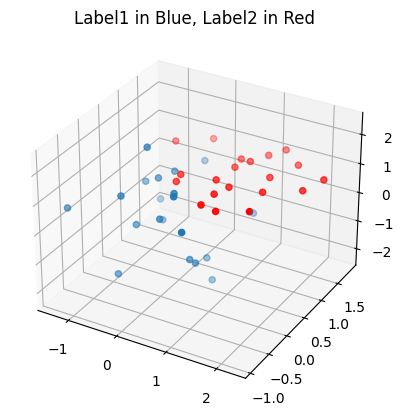

In [104]:
import matplotlib.pyplot as plt
import numpy as np

mean_1 = [0, 0, 0]
cov_1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]

label_1 = np.random.multivariate_normal(mean_1, cov_1, size=20).T

mean_2 = [1, 1, 1]
cov_2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.01]]

label_2 = np.random.multivariate_normal(mean_2, cov_2, size=20).T

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(label_1[0], label_1[1], label_1[2])
ax.scatter(label_2[0], label_2[1], label_2[2], c='r')
# ax.scatter(label_1, label_2)
ax.set_title('Label1 in Blue, Label2 in Red')

plt.show()

The plots of the two labels are both clustered near each other, but label 2 (in red) seems to be clustered more positively/higher in all three dimensions.

In [105]:
label_1 = label_1.T
#zeros = np.zeros(20)
label_2 = label_2.T
#ones = np.zeros(20)
X = np.concatenate((label_1, label_2), axis=0)
# target = np.concatenate((zeros, ones), axis=0)

In [106]:
print(X)
print(len(X))

[[ 0.71992588 -0.54604375  1.82924092]
 [ 0.57653442  0.50024722 -1.51467786]
 [-0.66211605  0.47203558  0.58751094]
 [ 0.76867048 -0.05745834 -0.94193744]
 [ 1.16743509 -0.92470634  1.30030316]
 [-0.22091138  0.2540835   1.14490418]
 [-0.37131465  0.54333983 -0.69528104]
 [ 0.98369495  1.24462993 -0.5857458 ]
 [-0.25379876  0.02087573  2.40389268]
 [ 0.44875325 -0.19235509  1.41724006]
 [-0.44335118 -0.52509715 -1.39108993]
 [-0.36333325 -0.1484711  -0.07803763]
 [-0.11041234  1.35221459  0.62706175]
 [-0.69254643  0.89059898 -0.49878057]
 [-0.41232646 -0.45470872  1.20928846]
 [ 0.18718107 -0.23250866  0.47319371]
 [ 0.69246507 -0.10863149 -0.79927837]
 [ 0.68176436  0.5103991  -2.25393908]
 [-1.37981454 -0.62809897  0.53126924]
 [-0.1045388   0.53216903  1.13192043]
 [ 0.6362362   1.18440232  0.91917976]
 [-0.00241887  0.5597792   1.03861651]
 [-0.20183238  1.71445715  0.97820499]
 [ 2.07352031  1.07882948  0.90009103]
 [ 1.10662706  0.02671371  0.89572115]
 [ 1.48324341  0.78612602

The Covariance matrix is a square matrix where the diagonal is var(x), var(y), var(z) respectively surrounded by corresponding covariances.

In [107]:
X = X.T
X_x = X[0]
X_y = X[1]
X_z = X[2]

def variance(col):
    print(col)
    print(len(col))
    col_mean = col.mean()
    summation = 0
    for i in col:
        print(i)
        temp = i - col_mean
        summation += (temp * temp)
    return summation / len(col)

def covariance(col1, col2):
    col1_mean = col1.mean()
    col2_mean = col2.mean()
    summation = 0
    for i1,i2 in np.c_[col1,col2]:
        temp1 = i1 - col1_mean
        temp2 = i2 - col2_mean
        summation += (temp1 * temp2)
    return summation / len(col1)

variance_x = variance(X_x)
variance_y = variance(X_y)
variance_z = variance(X_z)
cov_xy = covariance(X_x, X_y)
cov_xz = covariance(X_x, X_z)
cov_yx = covariance(X_y, X_x)
cov_yz = covariance(X_y, X_z)
cov_zx = covariance(X_z, X_x)
cov_zy = covariance(X_z, X_y)

covariance_X = [[variance_x, cov_xy, cov_xz], [cov_yx, variance_y, cov_yz], [cov_zx, cov_zy, variance_z]]
print("computed")
print(covariance_X)
print("actual")
print(np.cov(X[:, 0:2]))

[ 0.71992588  0.57653442 -0.66211605  0.76867048  1.16743509 -0.22091138
 -0.37131465  0.98369495 -0.25379876  0.44875325 -0.44335118 -0.36333325
 -0.11041234 -0.69254643 -0.41232646  0.18718107  0.69246507  0.68176436
 -1.37981454 -0.1045388   0.6362362  -0.00241887 -0.20183238  2.07352031
  1.10662706  1.48324341  0.85633139 -0.01175846  1.36476165  1.20011296
  0.65616421  0.6112596   2.29343373  0.93569441  1.72067976 -0.65390681
  0.84499323  1.57807285  0.95475702  0.85895756]
40
0.7199258766379507
0.5765344186878911
-0.6621160529567212
0.7686704839985907
1.1674350899575314
-0.2209113837708773
-0.371314648175998
0.9836949548505267
-0.2537987647576928
0.44875325064597027
-0.44335118482013525
-0.3633332462619656
-0.11041234182558902
-0.6925464344074577
-0.4123264561116921
0.1871810749912829
0.692465068152521
0.6817643574684824
-1.3798145375139004
-0.10453880227576556
0.6362361958626175
-0.002418872617178769
-0.20183238011526994
2.0735203127973048
1.1066270580012718
1.48324340996298

In [108]:
eigvals, eigvectors = np.linalg.eig(covariance_X)
P = eigvectors.T.dot(covariance_X)
print(P.T)

[[ 0.23331604 -0.48219854  0.43782909]
 [-0.32884993 -0.35793321  0.27643369]
 [-0.01373629  0.37868006  0.81880558]]


In [122]:
def myPCA(X , num_components):

    #center the data
    X_center = X - np.mean(X , axis = 0)

    # calculate covariance matrix of centered data
    cov_mat = np.cov(X_center , rowvar = False)

    # calculate eigen values and eigen vectors
    eigvals , eigvecs = np.linalg.eig(cov_mat)

    # sort eigenvaues in descending order
    sorted_index = np.argsort(eigvals)[::-1]
    sorted_eigenvalue = eigvals[sorted_index]
    sorted_eigenvecs= eigvecs[:,sorted_index]

    # only the top 2 eigen vectors
    eigenvector_subset = sorted_eigenvecs[:,0:num_components]

    #project using the top 2 eigenvectors to reduce 3d to 2d
    pcacomplete = np.dot(eigenvector_subset.transpose() , X_center.transpose() ).transpose()

    return pcacomplete

thepca = myPCA(X.T, 2)
thepca

array([[ 8.38396004e-01,  1.05001139e+00],
       [-1.75408777e+00, -1.16371158e+00],
       [-5.45188987e-01,  8.13087682e-01],
       [-1.34231892e+00, -7.07540576e-01],
       [ 4.85543452e-01,  6.54842407e-01],
       [ 6.31163637e-02,  9.20613081e-01],
       [-1.47761582e+00, -1.04601079e-01],
       [-5.72557298e-01, -1.32006531e+00],
       [ 1.04578761e+00,  1.73205643e+00],
       [ 4.68548354e-01,  8.36117169e-01],
       [-2.40312560e+00,  1.11859032e-01],
       [-1.14972508e+00,  5.67996554e-01],
       [-1.12776853e-02,  1.57100557e-02],
       [-1.35762563e+00,  4.33144080e-02],
       [-1.71220406e-01,  1.44231312e+00],
       [-4.59015817e-01,  5.30476980e-01],
       [-1.27078726e+00, -5.53889302e-01],
       [-2.32844613e+00, -1.63461587e+00],
       [-1.23098787e+00,  1.82520035e+00],
       [ 1.84084211e-01,  6.94446123e-01],
       [ 5.25168584e-01, -2.50995710e-01],
       [ 1.59254956e-01,  5.61398870e-01],
       [ 3.47549336e-01,  8.24680707e-02],
       [ 1.

In [126]:
import pandas as pd
zeros = np.zeros(20)
ones = np.ones(20)
target = np.concatenate((zeros, ones), axis=0)
print(target)
pd_target = pd.DataFrame(target, columns=['target'])

principal_df = pd.DataFrame(thepca , columns = ['label1','label2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target, columns=['target'])] , axis = 1)
principal_df

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


,label1,label2,target
0,0.838396,1.050011,0.0
1,-1.754088,-1.163712,0.0
2,-0.545189,0.813088,0.0
3,-1.342319,-0.707541,0.0
4,0.485543,0.654842,0.0
5,0.063116,0.920613,0.0
6,-1.477616,-0.104601,0.0
7,-0.572557,-1.320065,0.0
8,1.045788,1.732056,0.0
9,0.468548,0.836117,0.0


<AxesSubplot: xlabel='label1', ylabel='label2'>

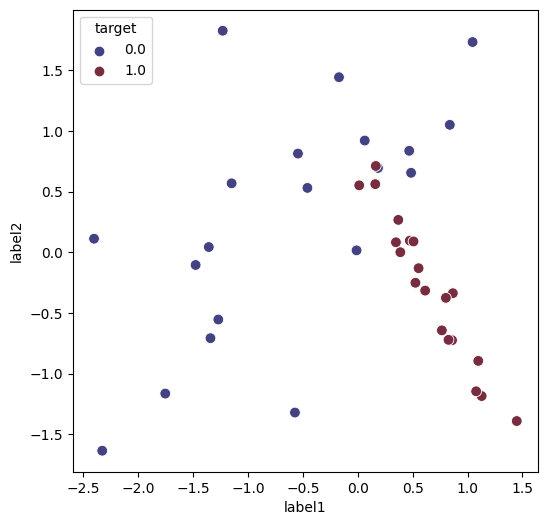

In [128]:
import seaborn as sb

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'label1',y = 'label2' , hue = 'target' , s = 60 , palette= 'icefire')